# PreProcessing and EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('dark_background')

In [3]:
data_DIR = '../data/'

In [4]:
raw_train_df = pd.read_csv(data_DIR + 'aug_train.csv', encoding='utf-8')
raw_test_df = pd.read_csv(data_DIR + 'aug_test.csv', encoding='utf-8')

df_dict = {'train' : raw_train_df, 'test' : raw_test_df}

In [5]:
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]
    raw_df.set_index(raw_df['enrollee_id'], inplace=True)
    raw_df.drop('enrollee_id', axis=1, inplace=True)

df_dict['train']

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [6]:
df_dict['train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [7]:
experience_category_list = list()

for i in range(22):
    if i==0:
        experience_category_list.append('<1')
    elif i==21:
        experience_category_list.append('>20')
    else:
        experience_category_list.append(str(i))

experience_category_list

['<1',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '>20']

In [8]:
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]
    raw_df.loc[raw_df['company_size'] == '10/49', 'company_size'] = '10-49'

In [9]:
company_category_list = list()

for i in range(8):
    if i==0:
        company_category_list.append('<10')
    elif i==1:
        company_category_list.append('10-49')
    elif i==2:
        company_category_list.append('50-99')
    elif i==3:
        company_category_list.append('100-500')
    elif i==4:
        company_category_list.append('500-999')
    elif i==5:
        company_category_list.append('1000-4999')
    elif i==6:
        company_category_list.append('5000-9999')
    elif i==7:
        company_category_list.append('10000+')

company_category_list

['<10',
 '10-49',
 '50-99',
 '100-500',
 '500-999',
 '1000-4999',
 '5000-9999',
 '10000+']

In [10]:
job_category_list = list()

for i in range(6):
    if i==0:
        job_category_list.append('never')
    elif i==5:
        job_category_list.append('>4')
    else:
        job_category_list.append(str(i))

job_category_list

['never', '1', '2', '3', '4', '>4']

In [11]:
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]

    raw_df[["city", "gender", "relevent_experience", "enrolled_university", 
             "education_level", "major_discipline", "experience", "company_size",
             "company_type", "last_new_job"]] = raw_df[["city", "gender", "relevent_experience", "enrolled_university", 
             "education_level", "major_discipline", "experience", "company_size",
             "company_type", "last_new_job"]].astype('category')

    raw_df["relevent_experience"].cat.set_categories(['No relevent experience', 'Has relevent experience'], ordered=True, inplace=True)
    raw_df["enrolled_university"].cat.set_categories(['Full time course', 'Part time course', 'no_enrollment'], ordered=True, inplace=True)
    raw_df["education_level"].cat.set_categories(['Phd', 'Masters', 'Graduate', 'High School', 'Primary School'], ordered=True, inplace=True)

    raw_df["experience"].cat.set_categories(experience_category_list, ordered=True, inplace=True)
    raw_df["company_size"].cat.set_categories(company_category_list, ordered=True, inplace=True)
    raw_df["last_new_job"].cat.set_categories(job_category_list, ordered=True, inplace=True)

In [12]:
df_dict['train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    19158 non-null  category
 1   city_development_index  19158 non-null  float64 
 2   gender                  14650 non-null  category
 3   relevent_experience     19158 non-null  category
 4   enrolled_university     18772 non-null  category
 5   education_level         18698 non-null  category
 6   major_discipline        16345 non-null  category
 7   experience              19093 non-null  category
 8   company_size            13220 non-null  category
 9   company_type            13018 non-null  category
 10  last_new_job            18735 non-null  category
 11  training_hours          19158 non-null  int64   
 12  target                  19158 non-null  float64 
dtypes: category(10), float64(2), int64(1)
memory usage: 794.0 KB


In [13]:
df_dict['train'].describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [14]:
df_dict['train'][['city', 'target']].groupby(['city'], as_index=False).mean().sort_values(
by='target', ascending=False)

,city,target
54,city_171,1.000000
32,city_139,0.800000
44,city_155,0.785714
79,city_42,0.692308
9,city_107,0.666667
...,...,...
25,city_129,0.000000
12,city_111,0.000000
111,city_82,0.000000
108,city_8,0.000000


In [15]:
df_dict['train'][['gender', 'target']].groupby(['gender'], as_index=False).mean().sort_values(
by='target', ascending=False)

,gender,target
0,Female,0.263328
2,Other,0.261780
1,Male,0.227819


In [16]:
df_dict['train'][['relevent_experience', 'target']].groupby(['relevent_experience'], as_index=False).mean().sort_values(
by='target', ascending=False)

,relevent_experience,target
0,No relevent experience,0.338427
1,Has relevent experience,0.214690


In [17]:
df_dict['train'][['enrolled_university', 'target']].groupby(['enrolled_university'], as_index=False).mean().sort_values(
by='target', ascending=False)

,enrolled_university,target
0,Full time course,0.380889
1,Part time course,0.252087
2,no_enrollment,0.211406


In [18]:
df_dict['train'][['education_level', 'target']].groupby(['education_level'], as_index=False).mean().sort_values(
by='target', ascending=False)

,education_level,target
2,Graduate,0.279790
1,Masters,0.214400
3,High School,0.195340
0,Phd,0.140097
4,Primary School,0.133117


In [19]:
df_dict['train'][['major_discipline', 'target']].groupby(['major_discipline'], as_index=False).mean().sort_values(
by='target', ascending=False)

,major_discipline,target
4,Other,0.267717
1,Business Degree,0.262997
5,STEM,0.261593
3,No Major,0.246637
2,Humanities,0.210762
0,Arts,0.209486


In [20]:
df_dict['train'][['experience', 'target']].groupby(['experience'], as_index=False).mean().sort_values(
by='target', ascending=False)

,experience,target
0,<1,0.454023
1,1,0.424408
3,3,0.353028
2,2,0.331854
4,4,0.325731
7,7,0.294747
5,5,0.288112
6,6,0.282072
8,8,0.243142
11,11,0.227410


In [21]:
df_dict['train'][['company_size', 'target']].groupby(['company_size'], as_index=False).mean().sort_values(
by='target', ascending=False)

,company_size,target
1,10-49,0.233855
7,10000+,0.190688
6,5000-9999,0.181172
2,50-99,0.176776
4,500-999,0.173318
0,<10,0.171254
3,100-500,0.161416
5,1000-4999,0.150602


In [22]:
df_dict['train'][['company_type', 'target']].groupby(['company_type'], as_index=False).mean().sort_values(
by='target', ascending=False)

,company_type,target
3,Other,0.239669
0,Early Stage Startup,0.235489
4,Public Sector,0.219895
2,NGO,0.186180
5,Pvt Ltd,0.180809
1,Funded Startup,0.139860


In [23]:
df_dict['train'][['last_new_job', 'target']].groupby(['last_new_job'], as_index=False).mean().sort_values(
by='target', ascending=False)

,last_new_job,target
0,never,0.301387
1,1,0.264303
2,2,0.241379
3,3,0.225586
4,4,0.221574
5,>4,0.182371


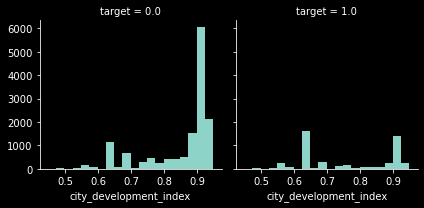

In [24]:
g = sns.FacetGrid(df_dict['train'], col='target')
g.map(plt.hist, 'city_development_index', bins=20)

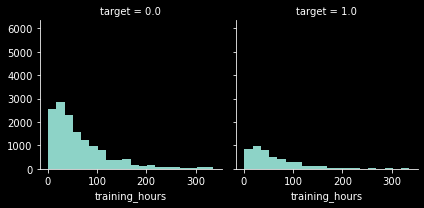

In [25]:
g.map(plt.hist, 'training_hours', bins=20)

In [26]:
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]

    raw_df['city_development_index'] = np.log(raw_df['city_development_index'])
    raw_df['training_hours'] = np.log(raw_df['training_hours'])

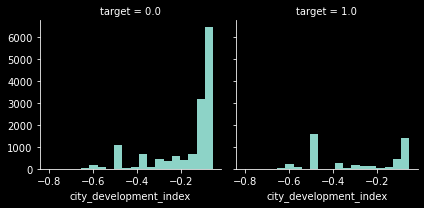

In [27]:
g = sns.FacetGrid(df_dict['train'], col='target')
g.map(plt.hist, 'city_development_index', bins=20)

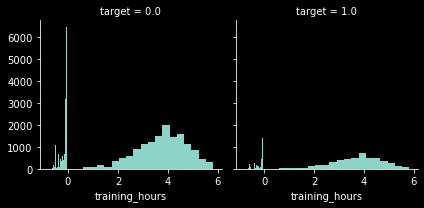

In [28]:
g.map(plt.hist, 'training_hours', bins=20)

<AxesSubplot:xlabel='training_hours', ylabel='city_development_index'>

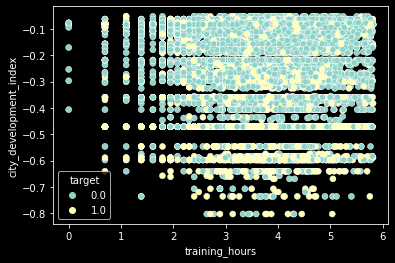

In [29]:
sns.scatterplot(data=df_dict['train'], x='training_hours', y='city_development_index',
               hue='target') 

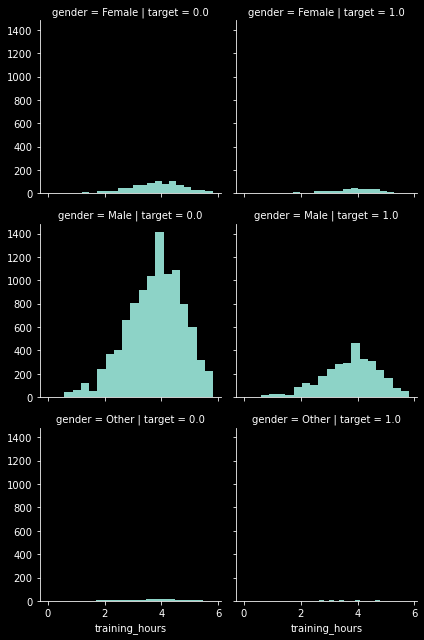

In [30]:
g = sns.FacetGrid(df_dict['train'], col='target', row='gender')
g.map(plt.hist, 'training_hours', bins=20)

<AxesSubplot:xlabel='last_new_job', ylabel='target'>

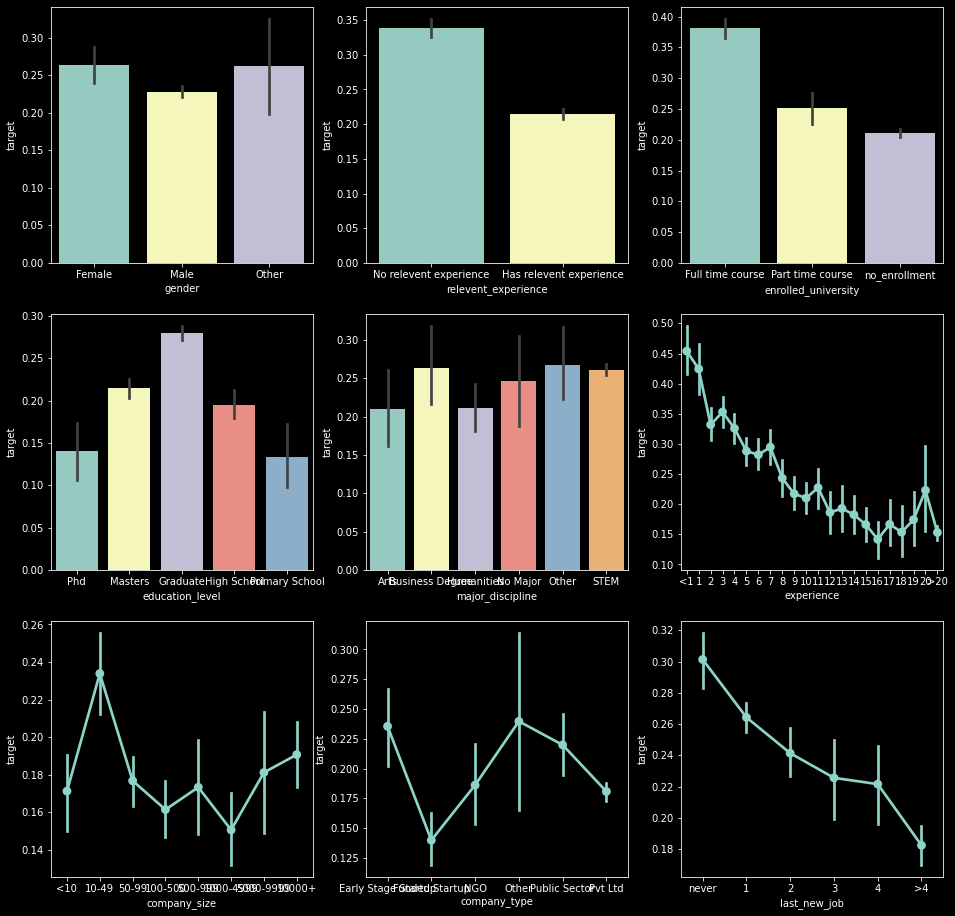

In [31]:
fig, saxis = plt.subplots(3, 3,figsize=(16,16))

sns.barplot(x = 'gender', y = 'target', data=df_dict['train'], ax = saxis[0,0])
sns.barplot(x = 'relevent_experience', y = 'target', data=df_dict['train'], ax = saxis[0,1])
sns.barplot(x = 'enrolled_university', y = 'target', data=df_dict['train'], ax = saxis[0,2])
sns.barplot(x = 'education_level', y = 'target',  data=df_dict['train'], ax = saxis[1,0])
sns.barplot(x = 'major_discipline', y = 'target',  data=df_dict['train'], ax = saxis[1,1])
sns.pointplot(x = 'experience', y = 'target', data=df_dict['train'], ax = saxis[1,2])
sns.pointplot(x = 'company_size', y = 'target', data=df_dict['train'], ax = saxis[2,0])
sns.pointplot(x = 'company_type', y = 'target', data=df_dict['train'], ax = saxis[2,1])
sns.pointplot(x = 'last_new_job', y = 'target', data=df_dict['train'], ax = saxis[2,2])

<AxesSubplot:xlabel='education_level', ylabel='city_development_index'>

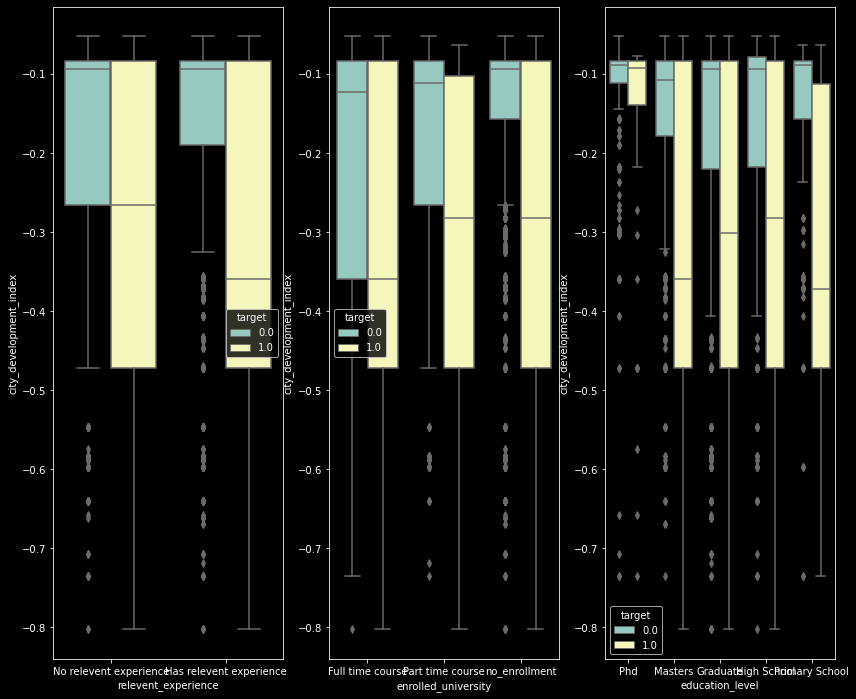

In [32]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'relevent_experience', y='city_development_index', hue='target', data=df_dict['train'], ax = axis1)  

sns.boxplot(x = 'enrolled_university', y='city_development_index', hue='target', data=df_dict['train'], ax = axis2) 

sns.boxplot(x = 'education_level', y='city_development_index', hue='target', data=df_dict['train'], ax = axis3) 

<AxesSubplot:xlabel='education_level', ylabel='training_hours'>

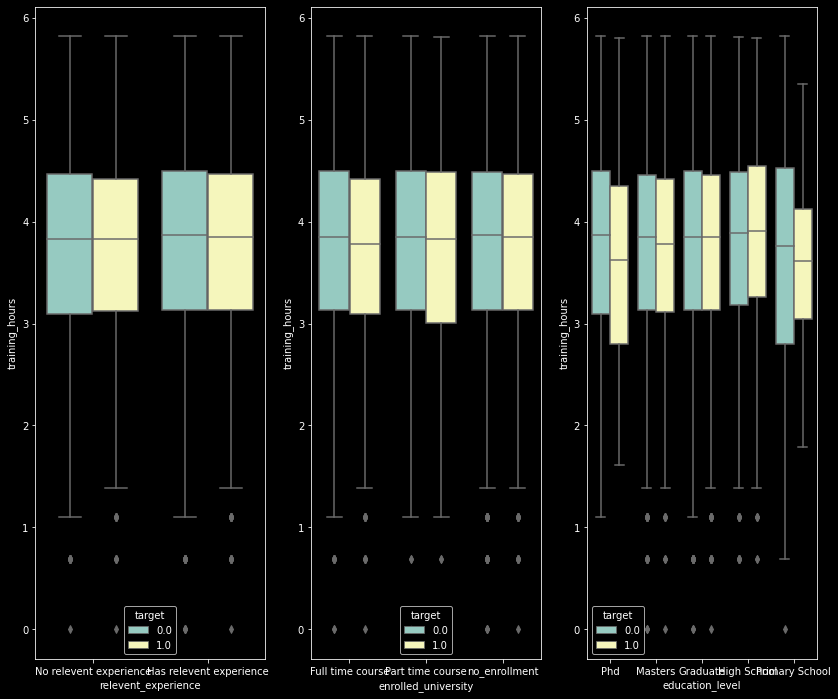

In [33]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'relevent_experience', y='training_hours', hue='target', data=df_dict['train'], ax = axis1)  

sns.boxplot(x = 'enrolled_university', y='training_hours', hue='target', data=df_dict['train'], ax = axis2) 

sns.boxplot(x = 'education_level', y='training_hours', hue='target', data=df_dict['train'], ax = axis3) 

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


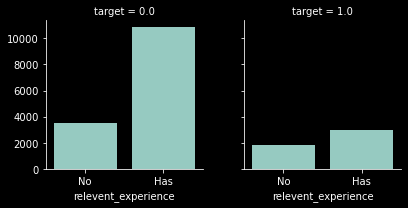

In [34]:
g = sns.FacetGrid(df_dict['train'], col='target')
g.map(sns.countplot, 'relevent_experience')
g.set_xticklabels(['No', 'Has'])

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


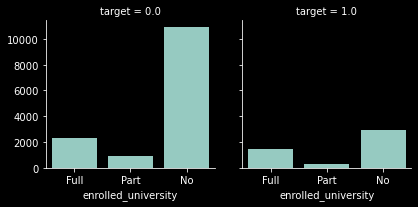

In [35]:
g = sns.FacetGrid(df_dict['train'], col='target')
g.map(sns.countplot, 'enrolled_university')
g.set_xticklabels(['Full', 'Part', 'No'])

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


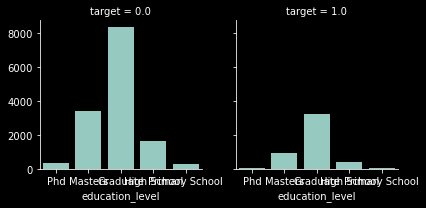

In [36]:
g = sns.FacetGrid(df_dict['train'], col='target')
g.map(sns.countplot, 'education_level')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


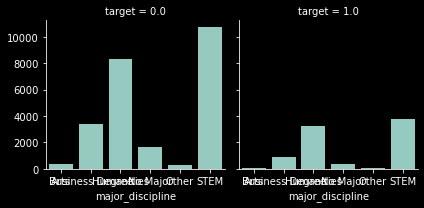

In [37]:
g.map(sns.countplot, 'major_discipline')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


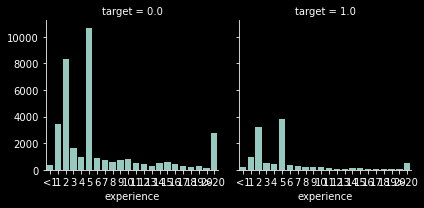

In [38]:
g.map(sns.countplot, 'experience')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


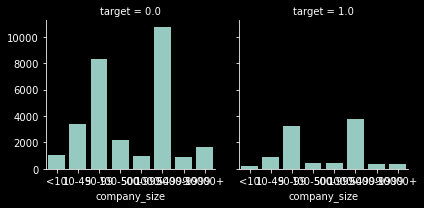

In [39]:
g.map(sns.countplot, 'company_size')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


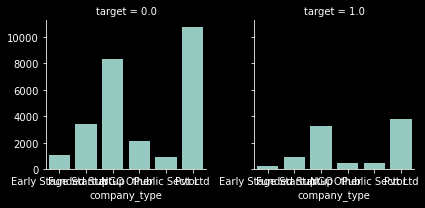

In [40]:
g.map(sns.countplot, 'company_type')

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


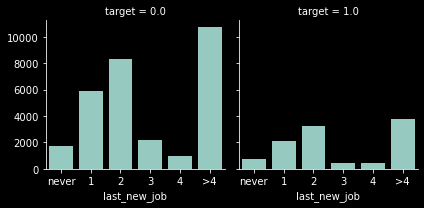

In [41]:
g.map(sns.countplot, 'last_new_job')

In [42]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [43]:
raw_df['relevent_experience'].astype('category').cat.codes

enrollee_id
32403    1
9858     1
31806    0
27385    1
27724    1
        ..
1289     0
195      1
31762    0
7873     1
12215    1
Length: 2129, dtype: int8

In [44]:
'''
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]

    new_df = pd.DataFrame()

    new_df['city_development_index'] = raw_df['city_development_index']
    new_df['relevent_experience'] = raw_df['relevent_experience'].astype('category').cat.codes
    new_df['enrolled_university'] = raw_df['enrolled_university'].astype('category').cat.codes
    new_df['education_level'] = raw_df['education_level'].astype('category').cat.codes
    new_df['last_new_job'] = raw_df['last_new_job'].astype('category').cat.codes

    new_df['experience'] = raw_df['experience'].astype('category').cat.codes
    new_df['experience_re'] = new_df['experience'].apply(lambda x: 0 if x <= 10 else 1)

    new_df['company_size'] = raw_df['company_size']
    new_df['company_size_re'] = new_df['company_size'].apply(lambda x: 1 if x == '10-49' else 0)

    new_df['company_type'] = raw_df['company_type']
    new_df['company_type_re'] = new_df['company_type'].apply(lambda x: 1 if x == 'Funded Startup' else 0)

    new_df.drop(['experience', 'company_size', 'company_type'], axis=1, inplace=True)
    new_df.replace(-1, np.NaN, inplace=True)
    
    if type_of_df == 'train':
        new_df['target'] = raw_df['target']
    
    df_dict[type_of_df] = new_df
    
'''

"\nfor type_of_df in ['train', 'test']:\n    raw_df = df_dict[type_of_df]\n\n    new_df = pd.DataFrame()\n\n    new_df['city_development_index'] = raw_df['city_development_index']\n    new_df['relevent_experience'] = raw_df['relevent_experience'].astype('category').cat.codes\n    new_df['enrolled_university'] = raw_df['enrolled_university'].astype('category').cat.codes\n    new_df['education_level'] = raw_df['education_level'].astype('category').cat.codes\n    new_df['last_new_job'] = raw_df['last_new_job'].astype('category').cat.codes\n\n    new_df['experience'] = raw_df['experience'].astype('category').cat.codes\n    new_df['experience_re'] = new_df['experience'].apply(lambda x: 0 if x <= 10 else 1)\n\n    new_df['company_size'] = raw_df['company_size']\n    new_df['company_size_re'] = new_df['company_size'].apply(lambda x: 1 if x == '10-49' else 0)\n\n    new_df['company_type'] = raw_df['company_type']\n    new_df['company_type_re'] = new_df['company_type'].apply(lambda x: 1 if x ==

In [45]:
for type_of_df in ['train', 'test']:
    raw_df = df_dict[type_of_df]

    new_df = pd.DataFrame()

    new_df['city_development_index'] = raw_df['city_development_index']
    new_df['relevent_experience'] = raw_df['relevent_experience'].astype('category').cat.codes
    new_df['enrolled_university'] = raw_df['enrolled_university'].astype('category').cat.codes
    new_df['education_level'] = raw_df['education_level'].astype('category').cat.codes
    new_df['last_new_job'] = raw_df['last_new_job'].astype('category').cat.codes
    new_df['experience_re'] = raw_df['experience'].astype('category').cat.codes
    
    new_df = pd.concat([new_df, pd.get_dummies(raw_df[['company_size', 'company_type']], columns = ['company_size', 'company_type'])], axis=1) 
    
    new_df.replace(-1, np.NaN, inplace=True)
    new_df['enrolled_university'].fillna(new_df['enrolled_university'].mean(), inplace=True) 
    new_df['education_level'].fillna(new_df['education_level'].mean(), inplace=True)
    new_df['last_new_job'].fillna(new_df['last_new_job'].mean(), inplace=True)
    new_df['experience_re'].fillna(new_df['experience_re'].mean(), inplace=True)
    
    if type_of_df == 'train':
        new_df['target'] = raw_df['target']
    new_df.rename(columns = {'company_size_<10' : 'company_size_0',
    'company_size_10-49': 'company_size_1',
    'company_size_50-99': 'company_size_2',
    'company_size_100-500': 'company_size_3',
    'company_size_500-999': 'company_size_4',
    'company_size_1000-4999': 'company_size_5',
    'company_size_5000-9999': 'company_size_6',
    'company_size_10000+': 'company_size_7'}, inplace=True)
    df_dict[type_of_df] = new_df

In [46]:
df_dict['test']

,city_development_index,relevent_experience,enrolled_university,education_level,last_new_job,experience_re,company_size_0,company_size_1,company_size_2,company_size_3,company_size_4,company_size_5,company_size_6,company_size_7,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
enrollee_id,,,,,,,,,,,,,,,,,,,,
32403,-0.189951,1,0.0,2.0,1.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9858,-0.083382,1,2.0,2.0,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31806,-0.471605,0,2.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27385,-0.189951,1,2.0,1.0,1.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
27724,-0.083382,1,2.0,2.0,5.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,-0.083382,0,2.0,2.0,4.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
195,-0.108699,1,2.0,1.0,2.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31762,-0.119910,0,2.0,4.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
df_dict['train']

,city_development_index,relevent_experience,enrolled_university,education_level,last_new_job,experience_re,company_size_0,company_size_1,company_size_2,company_size_3,...,company_size_5,company_size_6,company_size_7,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,-0.083382,1,2.000000,2.0,1.0,21.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
29725,-0.253603,0,2.000000,2.0,5.0,15.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.0
11561,-0.471605,0,0.000000,2.0,0.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
33241,-0.236989,0,1.535905,2.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
666,-0.265268,1,2.000000,1.0,4.0,21.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,-0.130109,0,2.000000,2.0,1.0,14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
31398,-0.083382,1,2.000000,2.0,4.0,14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24576,-0.083382,1,2.000000,2.0,4.0,21.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.0


In [48]:
df_dict['train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            19158 non-null  float64
 1   relevent_experience               19158 non-null  int8   
 2   enrolled_university               19158 non-null  float64
 3   education_level                   19158 non-null  float64
 4   last_new_job                      19158 non-null  float64
 5   experience_re                     19158 non-null  float64
 6   company_size_0                    19158 non-null  uint8  
 7   company_size_1                    19158 non-null  uint8  
 8   company_size_2                    19158 non-null  uint8  
 9   company_size_3                    19158 non-null  uint8  
 10  company_size_4                    19158 non-null  uint8  
 11  company_size_5                    19158 non-null  uint8  
 12  c

In [49]:
df_dict['train'].describe()

,city_development_index,relevent_experience,enrolled_university,education_level,last_new_job,experience_re,company_size_0,company_size_1,company_size_2,company_size_3,...,company_size_5,company_size_6,company_size_7,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,...,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,-0.200279,0.719908,1.535905,1.863301,2.000427,10.100141,0.068274,0.076783,0.160925,0.134200,...,0.069318,0.029387,0.105387,0.031475,0.052250,0.027195,0.006316,0.049849,0.512423,0.249348
std,0.163611,0.449056,0.797462,0.682238,1.656994,6.765517,0.252223,0.266253,0.367471,0.340876,...,0.254001,0.168894,0.307059,0.174602,0.222536,0.162655,0.079223,0.217638,0.499859,0.432647
min,-0.802962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.301105,0.000000,1.000000,1.863301,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.102033,1.000000,2.000000,2.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-0.083382,1.000000,2.000000,2.000000,3.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,-0.052346,1.000000,2.000000,4.000000,5.000000,21.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df_dict['train'].loc[df_dict['train']['enrolled_university'] == -1,]

,city_development_index,relevent_experience,enrolled_university,education_level,last_new_job,experience_re,company_size_0,company_size_1,company_size_2,company_size_3,...,company_size_5,company_size_6,company_size_7,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
enrollee_id,,,,,,,,,,,,,,,,,,,,,


In [51]:
df_dict['test'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 32403 to 12215
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            2129 non-null   float64
 1   relevent_experience               2129 non-null   int8   
 2   enrolled_university               2129 non-null   float64
 3   education_level                   2129 non-null   float64
 4   last_new_job                      2129 non-null   float64
 5   experience_re                     2129 non-null   float64
 6   company_size_0                    2129 non-null   uint8  
 7   company_size_1                    2129 non-null   uint8  
 8   company_size_2                    2129 non-null   uint8  
 9   company_size_3                    2129 non-null   uint8  
 10  company_size_4                    2129 non-null   uint8  
 11  company_size_5                    2129 non-null   uint8  
 12  c

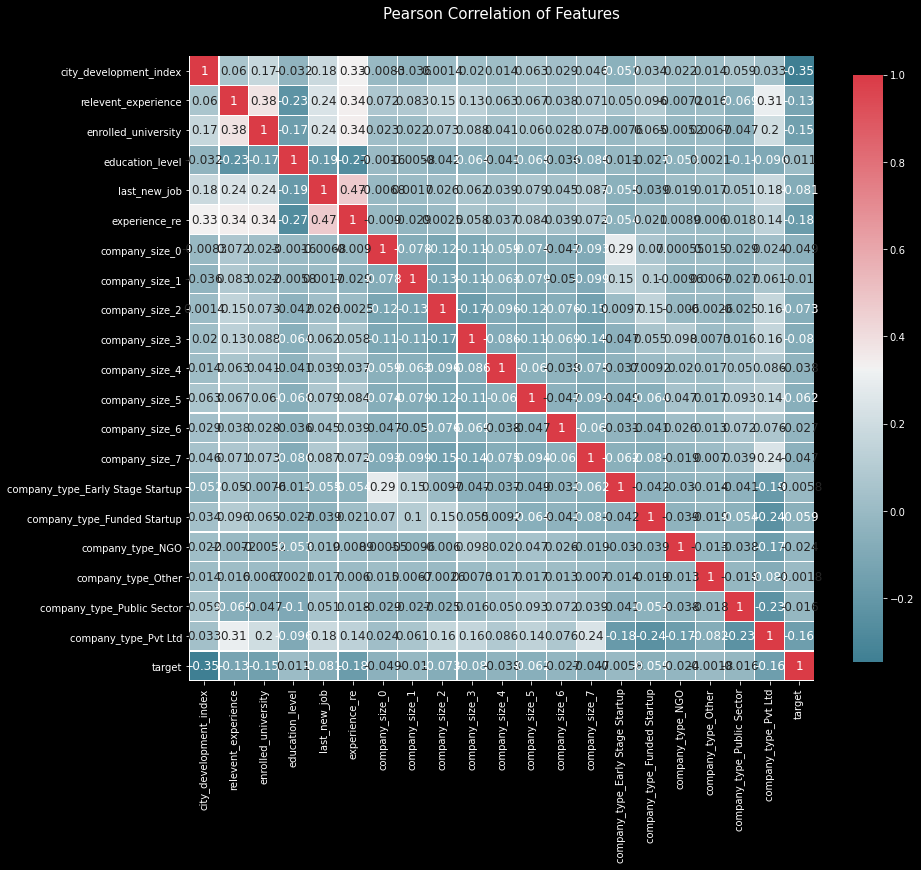

In [52]:
correlation_heatmap(df_dict['train'])

# Modeling

In [53]:
#Common Model Algorithms
import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [54]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [55]:
answer_array = np.load(data_DIR + 'jobchange_test_target_values.npy')

In [56]:
def calculate_accuracy(real_answer, my_answer):
    accuracy = 0.0
    correct_value = 0
    data_len = 0
    for i in range(len(real_answer)):
        if real_answer[i] == my_answer[i]:
            correct_value += 1
        data_len += 1
        
    accuracy = correct_value / data_len * 100
    return accuracy

In [57]:
features_list = df_dict['train'].columns
features_list = features_list[:-1]
features_list

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'education_level', 'last_new_job', 'experience_re', 'company_size_0',
       'company_size_1', 'company_size_2', 'company_size_3', 'company_size_4',
       'company_size_5', 'company_size_6', 'company_size_7',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd'],
      dtype='object')

In [58]:
acc_dict = dict()
# features_list = ['city_development_index', 'relevent_experience', 'enrolled_university',
#                  'last_new_job', 'education_level', 'experience_re', 'company_size_re', 'company_type_re']  
# not chosen :

for alg in MLA:
    train_data = df_dict['train']
    test_data = df_dict['test']

    X_train = train_data[features_list]
    Y_train = train_data['target']

    X_test = test_data[features_list]

    model = alg
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    accuracy = calculate_accuracy(answer_array, Y_pred)
    
    fpr, tpr, thresholds = metrics.roc_curve(answer_array, Y_pred)
    auc_percent = 100 * metrics.auc(fpr, tpr)
    
    model_name = alg.__class__.__name__
    acc_dict[model_name] = Y_pred
    print(f"<model name>: {model_name:30} | <accuracy>: {accuracy:0.2f}% | <AUC>: {auc_percent:0.2f}%")

<model name>: AdaBoostClassifier             | <accuracy>: 76.51% | <AUC>: 62.22%
<model name>: BaggingClassifier              | <accuracy>: 74.17% | <AUC>: 64.43%
<model name>: ExtraTreesClassifier           | <accuracy>: 74.73% | <AUC>: 64.71%
<model name>: GradientBoostingClassifier     | <accuracy>: 78.72% | <AUC>: 68.49%
<model name>: RandomForestClassifier         | <accuracy>: 76.09% | <AUC>: 66.68%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

<model name>: LogisticRegressionCV           | <accuracy>: 75.06% | <AUC>: 59.37%
<model name>: PassiveAggressiveClassifier    | <accuracy>: 74.35% | <AUC>: 66.69%
<model name>: RidgeClassifierCV              | <accuracy>: 75.01% | <AUC>: 58.95%
<model name>: SGDClassifier                  | <accuracy>: 76.56% | <AUC>: 63.02%
<model name>: Perceptron                     | <accuracy>: 27.10% | <AUC>: 50.03%
<model name>: BernoulliNB                    | <accuracy>: 73.23% | <AUC>: 58.49%
<model name>: GaussianNB                     | <accuracy>: 71.25% | <AUC>: 67.95%
<model name>: KNeighborsClassifier           | <accuracy>: 71.72% | <AUC>: 59.92%
<model name>: DecisionTreeClassifier         | <accuracy>: 70.83% | <AUC>: 61.82%
<model name>: ExtraTreeClassifier            | <accuracy>: 71.96% | <AUC>: 63.30%
<model name>: LinearDiscriminantAnalysis     | <accuracy>: 75.67% | <AUC>: 61.42%
<model name>: QuadraticDiscriminantAnalysis  | <accuracy>: 71.91% | <AUC>: 70.26%
[12:24:43] WARNI

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<model name>: XGBClassifier                  | <accuracy>: 77.92% | <AUC>: 69.52%


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(answer_array, Y_pred)
metrics.auc(fpr, tpr)

0.6952264210846391

In [60]:
cf_matrix = metrics.confusion_matrix(answer_array, Y_pred)

<AxesSubplot:>

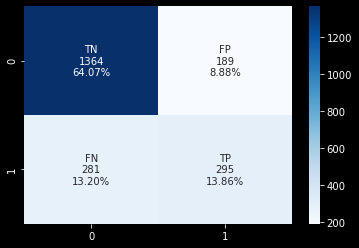

In [61]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [62]:
thresholds

array([2., 1., 0.])

In [63]:
np.save(data_DIR + 'jobchange_predict_values.npy',acc_dict['GradientBoostingClassifier'])